# A Machine Learning approach to Estimating UK Property (Housing) Prices

## Introduction

### Machine learning is based on Artificial Intelligence. The question arises here, what is the base of Artificial Intelligence? The answer is the data. The more you refine your data, the better will be the results. Data can be of any type,Discrete or Continuous.  It depends on the problem you want to solve. There are two techniques in Machine Learning, supervised and unsupervised. If you want to predict or forecast, it means you want to supervise the data.  

## Problem

### Estimate the property prices, basic housing in the UK.

### Estimating Housing Prices is a Regression Analysis, which can be linear or non-linear.

## Data Preprocessing

### The data preprocessing involves ETL (Extract, Transform, and Load) and Data Cleaning.

### During data collecting, you fetch data from multiple sites. After fetching, you then apply ETL to bring data altogether. Here, we pulled data from "Office from National Statistics (UK)" and "Internationally Monetary Fund (IMF)".

### After the ETL step, now it's time for refining the data. In Data Cleaning, you eliminate or replace specific values or columns which has no information. In this way, you avoid any data loss. 

### Due to data variation, we have created two versions of the finalized data. One for estimating housing prices, the other one for seeing the correlation between the housing prices and the rental cost. Though the best solution is to execute all the tasks on one dataset.  But here the data for the rental housing is a very small sample and it is in the form of Index Private Rental Housing and Consumer Price Inflation Housing Index. 

### Fetching Libraries

In [26]:
# Fetching Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
#from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor
from learntools.core import *
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-statistics-data/Dwelling_Prices.csv
/kaggle/input/uk-statistics-data/IPHR_Price.csv
/kaggle/input/uk-statistics-data/UK_Economy_Statistics.csv
/kaggle/input/uk-statistics-data/CPIH.csv
/kaggle/input/uk-statistics-data/Average-prices-2020-10.csv
/kaggle/input/uk-statistics-data/IPHRP_Change.csv


### Data For Model Designing

#### This data is comprised of all the main UK statistics that can influence the housing prices.

In [2]:
# Reading the File
df_economy = pd.read_csv('/kaggle/input/uk-statistics-data/UK_Economy_Statistics.csv')
# Dropping no information values 
df_economy.drop([i for i in range(9)],inplace=True)
# Reset Index
df_economy.reset_index(inplace=True)
# Dropping no information Columns
df_economy.drop(['index'],axis=1,inplace=True)
# Reaplacing garbage values with assumption based values 
df_economy['Inflation_Rate'].fillna(np.mean(df_economy['Inflation_Rate']),inplace=True)
df_economy['Population'].fillna(np.mean(df_economy['Population']),inplace=True)
#df_economy.head()
# Reading the file
df_hp = pd.read_csv('/kaggle/input/uk-statistics-data/Average-prices-2020-10.csv')
# Dropping the rows before the start of 1980 
df_hp.drop([i for i in range(1410)],inplace=True)
# Picking only UK house prices
df_hp = df_hp[df_hp['Region_Name'] =='United Kingdom']
# Dropping unnecessary columns
df_hp.drop(['Area_Code','Monthly_Change','Annual_Change','Average_Price_SA'],
           axis=1,inplace=True)
# Reset the index, starting from 0
df_hp.reset_index(inplace=True)
df_hp.drop(['index'],axis=1,inplace=True)
# Crreating dummy values for the last two months of 2020 which we don't have the data
for i in range(2):
    nan_values = pd.Series([np.nan,np.nan,np.nan], index=['Date','Region_Name',
                                                             'Average_Price',])
    df_hp = df_hp.append(nan_values,ignore_index=True)
# Filling NaN values with appropriate or assumption based data    
df_hp['Date'].loc[490:490].fillna('2020-1{}-01'.format(1),inplace=True)
df_hp['Date'].loc[491:491].fillna('2020-1{}-01'.format(2),inplace=True)
df_hp['Region_Name'].fillna('United Kingdom',inplace=True)
df_hp['Average_Price'].loc[490:490].fillna(246777.0200,inplace=True)
df_hp['Average_Price'].loc[491:491].fillna(247555.3456,inplace=True)
# Taking Average house price of every year
lst = []
final_lst =[]
i = 0
for value in df_hp['Average_Price'].values:
    lst.append(value)
    i +=1
    if i > 11:
        final_lst.append(round(np.mean(lst),4))
        lst = []
        i = 0
# Creating the final dataframe comprising of Year and House Price     
dic1 = {'Year':['{}{}{}{}'.format(i,j,k,l) for i in range(1,2) for j in range(9,10)
               for k in range(8,10) for l in range(0,10)],\
       'Average_House_Price':[value for value in final_lst[:20]]}

dic2 = {'Year':['{}{}{}{}'.format(i,j,k,l) for i in range(2,3) for j in range(0,1)
               for k in range(0,2) for l in range(0,10)],\
       'Average_House_Price':[value for value in final_lst[20:40]]}
dic3 = {'Year':'2020','Average_House_Price':[value for value in final_lst[40:41]]}
df1 = pd.DataFrame(data=dic1)
df2= pd.DataFrame(data=dic2)
df3 = pd.DataFrame(data=dic3)
# Concatenating the Data
df_newhp = pd.concat([df1, df2,df3])
df_newhp.reset_index(inplace=True)
df_newhp.drop(['index'],axis=1,inplace=True)
#df_newhp.head()
# Finalizing the Data
df = pd.merge(df_economy,df_newhp,left_index=True,right_index=True)
df.drop(['Year_y'],axis=1,inplace=True)
df.rename(columns={'Year_x':'Year'},inplace=True)
df.head()

,Year,Employment_Rate,Unemployment_Rate,Inflation_Rate,Population,GDP,Average_House_Price
0,1980,70.8,6.8,2.6,56329700.0,-2.0,20267.8703
1,1981,68.5,9.6,2.6,56357500.0,-0.8,21430.5311
2,1982,66.8,10.7,2.6,56290700.0,2.0,21938.2433
3,1983,65.9,11.5,2.6,56315700.0,4.2,24522.4983
4,1984,66.8,11.8,2.6,56409300.0,2.3,26807.2031


### Data for Rental Cost Analysis

#### As due to unavailability of main data, we create a subset data of UK as "England" and extract all the associated rental cost (in terms of indexing, starting form '100') and the average housing prices.  

In [3]:
# Fetching 
df_iphr = pd.read_csv('/kaggle/input/uk-statistics-data/IPHR_Price.csv',skiprows=6)
df_iphr.rename(columns={'Unnamed: 0':'Year'},inplace=True)
df_iphr.drop(['Unnamed: 1','United Kingdom','Great Britain','Unnamed: 4',
             'Wales','Scotland','Northern Ireland1'],axis=1,inplace=True)
df_iphr.dropna(inplace=True)
df_iphr.drop([1,13,25],inplace=True)
df_iphr.reset_index(inplace=True)
df_iphr.drop(['index'],axis=1,inplace=True)
#df_iphr.head(5)
# Fetching
df_prices = pd.read_csv('/kaggle/input/uk-statistics-data/Average-prices-2020-10.csv')
# Dropping unnecessary rows
df_prices.drop([i for i in range(65661)],inplace=True)
# Picking only England house prices
df_prices = df_prices[df_prices['Region_Name'] =='England']
# Dropping unnecessary columns
df_prices.drop(['Area_Code','Monthly_Change','Annual_Change','Average_Price_SA'],
           axis=1,inplace=True)
# Reset the index, starting from 0
df_prices.reset_index(inplace=True)
df_prices.drop(['index'],axis=1,inplace=True)
# Crreating dummy values for the last two months of 2020 which we don't have the data
for i in range(2):
    nan_values = pd.Series([np.nan,np.nan,np.nan], index=['Date','Region_Name',
                                                             'Average_Price',])
    df_prices = df_prices.append(nan_values,ignore_index=True)
# Filling NaN values with appropriate or assumption based data    
df_prices['Date'].loc[154:154].fillna('2020-1{}-01'.format(1),inplace=True)
df_prices['Date'].loc[155:155].fillna('2020-1{}-01'.format(2),inplace=True)
df_prices['Region_Name'].fillna('England',inplace=True)
df_prices['Average_Price'].loc[154:154].fillna(246777.0200,inplace=True)
df_prices['Average_Price'].loc[155:155].fillna(247555.3456,inplace=True)
# Taking Average house price of every year
lst = []
final_lst =[]
i = 0
for value in df_prices['Average_Price'].values:
    lst.append(value)
    i +=1
    if i > 11:
        final_lst.append(round(np.mean(lst),4))
        lst = []
        i = 0

print (df_prices.shape)
df_prices.tail()

# Creating the final dataframe comprising of Year and House Price     
dic = {'Year':['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
               '2017', '2018', '2019','2020'],\
       'Average_House_Price':[value for value in final_lst]}
df_newp = pd.DataFrame(data=dic)
#df_newp.head()
# Fetching CPIH Data
df_cpih = pd.read_csv('/kaggle/input/uk-statistics-data/CPIH.csv',skiprows=4)
df_cpih.drop(['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)
df_cpih.rename(columns={'Unnamed: 2':'Services'},inplace=True)
df_cpih.drop([i for i in range(28)],inplace=True)
df_cpih.drop([i for i in range(29,78)],inplace=True)
df_cpih = df_cpih.T
df_cpih.reset_index(inplace=True)
df_cpih.drop(0,inplace=True)
df_cpih.reset_index(inplace=True)
df_cpih.drop(['level_0'],axis=1,inplace=True)
df_cpih.rename(columns={'index':'Year',28:'CPIH'},inplace=True)
#df_cpih.head()
df_rent = pd.merge(df_iphr,df_newp,right_index=True,left_index=True)
df_rent.drop(['Year_y'],axis=1,inplace=True)
df_rent.rename(columns={'Year_x':'Year'},inplace=True)
#df_rent.head()
df_rental = pd.merge(df_cpih,df_rent,right_index=True,left_index=True)
df_rental.drop(['Year_y'],axis=1,inplace=True)
df_rental.rename(columns={'Year_x':'Year'},inplace=True)
df_rental['CPIH']=df_rental['CPIH'].astype(float)
df_rental['Year']=df_rental['Year'].astype(int)
df_rental.head()

(156, 3)


,Year,CPIH,England,Average_House_Price
0,2008,84.8,88.5,182379.8269
1,2009,86.3,91.1,166558.6392
2,2010,87.5,90.3,177472.5355
3,2011,89.7,91.4,175229.9605
4,2012,92.7,94.0,177488.0203


## Data Analysis

### The Data analysis provides the way to choose features that can affect the predicting value

### The statistical Analysis provides the statistical significance of any feature (the independent variables) for the target or dependent variable.

### P-Value is the threshold to check the significance. If P-value < 0.05 (95% Confidence Interval) of any independent variable, it is become statistically significant to affect the outcome. In our case, any statistically significant variable will affect the Housing Price. To check the P-value, the correlation is the answer.

### There are mathematical and visualization ways to confirm the correlation like strong, modest, or weak relation either positive or negative to the predicted variable.

### We will perform one by one to see.

### Model Designing Data

In [13]:
# Our Dataset
df.head()

,Year,Employment_Rate,Unemployment_Rate,Inflation_Rate,Population,GDP,Average_House_Price
0,1980,70.8,6.8,2.6,56329700.0,-2.0,20267.8703
1,1981,68.5,9.6,2.6,56357500.0,-0.8,21430.5311
2,1982,66.8,10.7,2.6,56290700.0,2.0,21938.2433
3,1983,65.9,11.5,2.6,56315700.0,4.2,24522.4983
4,1984,66.8,11.8,2.6,56409300.0,2.3,26807.2031


### Mathematical Techniques

In [4]:
df.corr()

,Year,Employment_Rate,Unemployment_Rate,Inflation_Rate,Population,GDP,Average_House_Price
Year,1.000000,0.790984,-0.746968,-0.385534,0.925874,-0.226787,0.972454
Employment_Rate,0.790984,1.000000,-0.952942,-0.200530,0.702151,-0.231274,0.802652
Unemployment_Rate,-0.746968,-0.952942,1.000000,0.319268,-0.640037,0.177553,-0.751319
Inflation_Rate,-0.385534,-0.200530,0.319268,1.000000,-0.333135,-0.181199,-0.352620
Population,0.925874,0.702151,-0.640037,-0.333135,1.000000,-0.164376,0.924666
GDP,-0.226787,-0.231274,0.177553,-0.181199,-0.164376,1.000000,-0.283864
Average_House_Price,0.972454,0.802652,-0.751319,-0.352620,0.924666,-0.283864,1.000000


In [5]:
from scipy import stats

#1
pearson_coef, p_value = stats.pearsonr(df['GDP'], df['Average_House_Price'])
print(" The Pearson Correlation Coefficient 'GDP' is", pearson_coef, " with a P-value of P =", p_value)

#2
pearson_coef, p_value = stats.pearsonr(df['Employment_Rate'], df['Average_House_Price'])
print("The Pearson Correlation Coefficient 'Employment_Rate' is", pearson_coef, " with a P-value of P =", p_value)

#3
pearson_coef, p_value = stats.pearsonr(df['Unemployment_Rate'], df['Average_House_Price'])
print("The Pearson Correlation Coefficient 'Unemployment_Rate' is", pearson_coef, " with a P-value of P =", p_value)

#4
pearson_coef, p_value = stats.pearsonr(df['Inflation_Rate'], df['Average_House_Price'])
print("The Pearson Correlation Coefficient 'Inflation_Rate' is", pearson_coef, " with a P-value of P =", p_value)

#5
pearson_coef, p_value = stats.pearsonr(df['Year'], df['Average_House_Price'])
print("The Pearson Correlation Coefficient 'Year' is", pearson_coef, " with a P-value of P =", p_value)

 The Pearson Correlation Coefficient 'GDP' is -0.2838635521741595  with a P-value of P = 0.07208136840464924
The Pearson Correlation Coefficient 'Employment_Rate' is 0.8026515406988166  with a P-value of P = 2.7590610807801806e-10
The Pearson Correlation Coefficient 'Unemployment_Rate' is -0.7513188039771392  with a P-value of P = 1.5157308109183596e-08
The Pearson Correlation Coefficient 'Inflation_Rate' is -0.3526201948185306  with a P-value of P = 0.023745325561584058
The Pearson Correlation Coefficient 'Year' is 0.9724538135198548  with a P-value of P = 2.811777148585406e-26


### Visualization 

<AxesSubplot:>

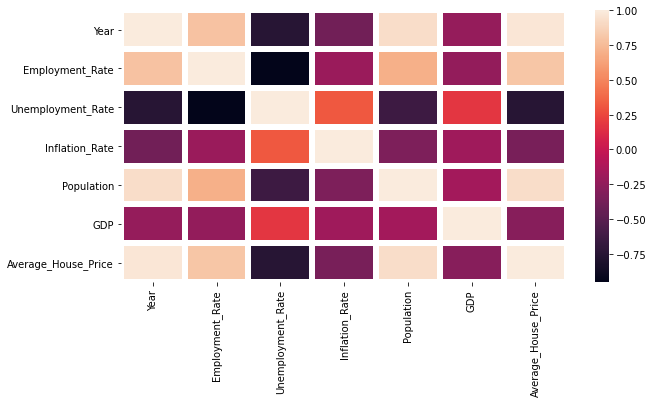

In [6]:
### View of Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df._get_numeric_data().corr()
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.heatmap(corr_matrix, annot=False, linewidths=5, ax=ax, xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
#sns.heatmap(corr, annot=True, fmt=".1f",linewidth=0.5 xticklabels=corr.columns.values,yticklabels=corr.columns.values)

<AxesSubplot:xlabel='Population', ylabel='Average_House_Price'>

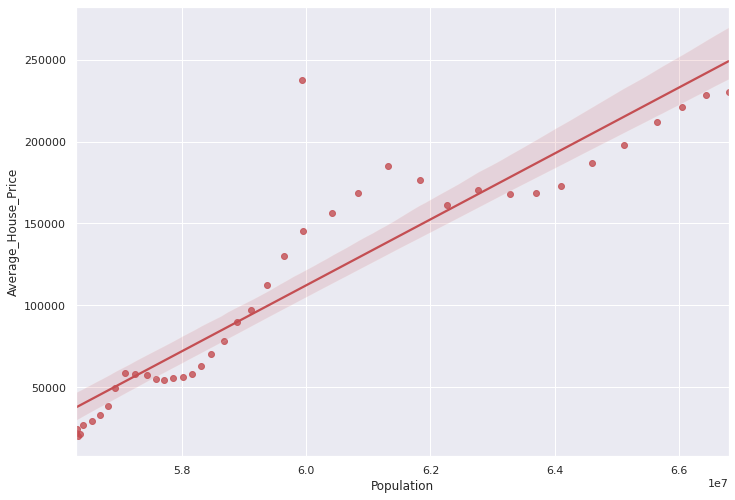

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df['Population'],df['Average_House_Price'],color = 'r')

<AxesSubplot:xlabel='Year', ylabel='Average_House_Price'>

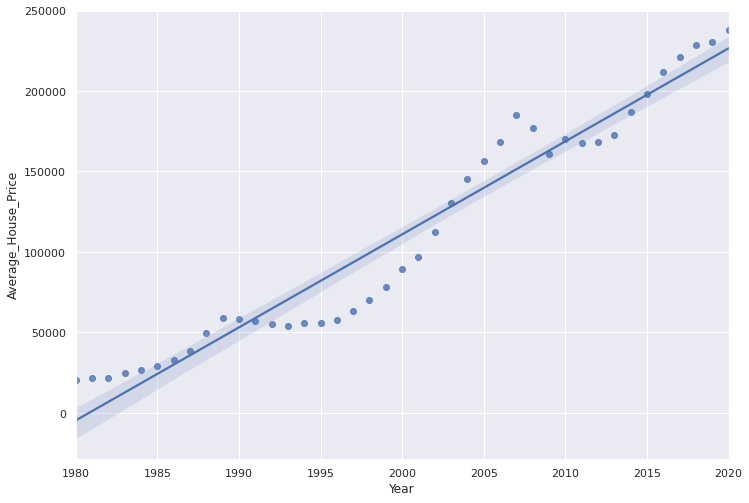

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df['Year'],df['Average_House_Price'],color = 'b')

<AxesSubplot:xlabel='Inflation_Rate', ylabel='Average_House_Price'>

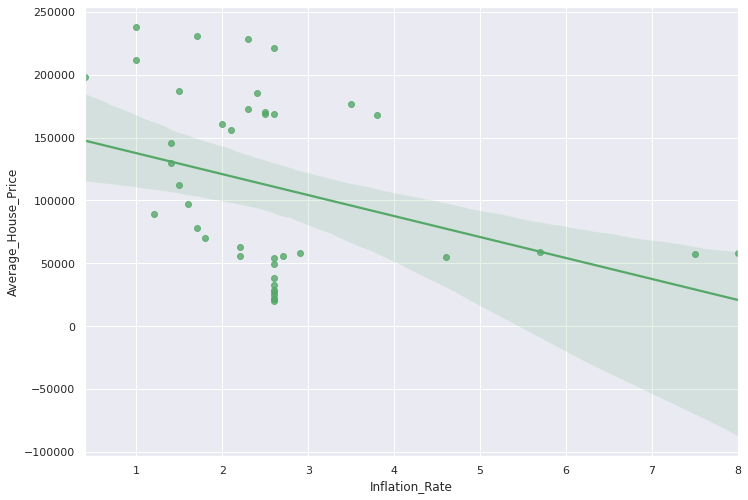

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df['Inflation_Rate'],df['Average_House_Price'],color = 'g')

<AxesSubplot:xlabel='Unemployment_Rate', ylabel='Average_House_Price'>

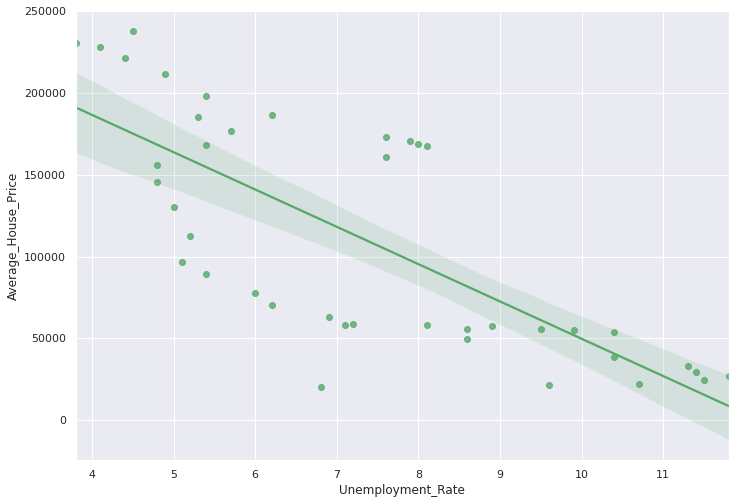

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df['Unemployment_Rate'],df['Average_House_Price'],color = 'g')

<AxesSubplot:xlabel='Employment_Rate', ylabel='Average_House_Price'>

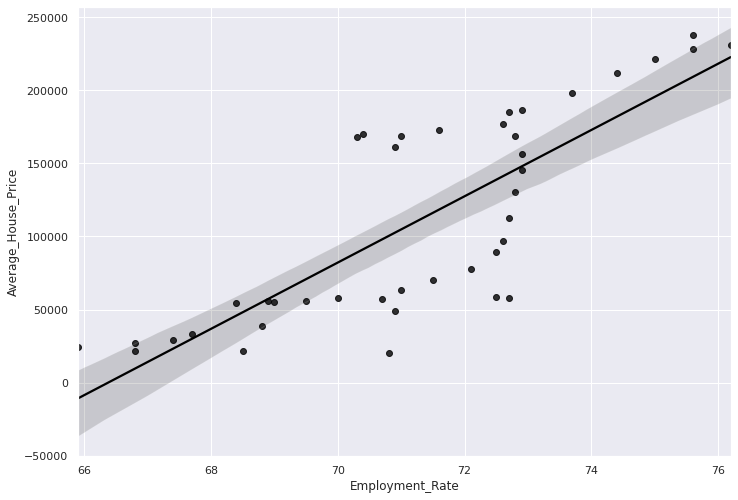

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df['Employment_Rate'],df['Average_House_Price'],color = 'black')

<AxesSubplot:xlabel='GDP', ylabel='Average_House_Price'>

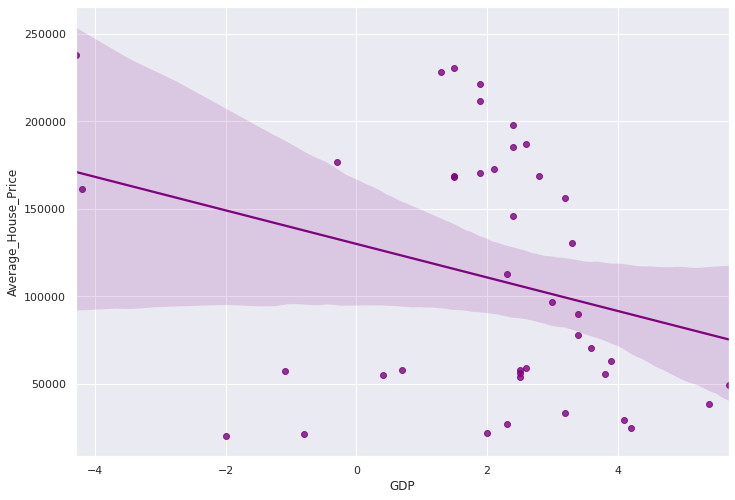

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df['GDP'],df['Average_House_Price'],color = 'purple')

### All the techniques are showing the same results. 

### The GDP and Inflation_rate provides less effective (P_value > 0.05) while the Year, Employement_rate and Unemployment_rate are very significant (P_value < 0.05) to Housing Prices.

### Rental Cost VS Average Home Price

### The same technique will apply here to check Satistical Significance

In [13]:
# Dataset
df_rental.head()

,Year,CPIH,England,Average_House_Price
0,2008,84.8,88.5,182379.8269
1,2009,86.3,91.1,166558.6392
2,2010,87.5,90.3,177472.5355
3,2011,89.7,91.4,175229.9605
4,2012,92.7,94.0,177488.0203


### Mathematical Way

In [14]:
df_rental.corr()

,Year,CPIH,England,Average_House_Price
Year,1.000000,0.985048,0.991500,0.946431
CPIH,0.985048,1.000000,0.981217,0.927559
England,0.991500,0.981217,1.000000,0.963090
Average_House_Price,0.946431,0.927559,0.963090,1.000000


In [16]:
from scipy import stats

#1
pearson_coef, p_value = stats.pearsonr(df_rental['CPIH'], df_rental['Average_House_Price'])
print(" The Pearson Correlation Coefficient 'CPIH' is", pearson_coef, " with a P-value of P =", p_value)

#2
pearson_coef, p_value = stats.pearsonr(df_rental['England'], df_rental['Average_House_Price'])
print("The Pearson Correlation Coefficient 'England' is", pearson_coef, " with a P-value of P =", p_value)

#3
pearson_coef, p_value = stats.pearsonr(df_rental['Year'], df_rental['Average_House_Price'])
print("The Pearson Correlation Coefficient 'Year' is", pearson_coef, " with a P-value of P =", p_value)

 The Pearson Correlation Coefficient 'CPIH' is 0.9275591829427423  with a P-value of P = 4.968327520609589e-06
The Pearson Correlation Coefficient 'England' is 0.9630901025108021  with a P-value of P = 1.304966501603778e-07
The Pearson Correlation Coefficient 'Year' is 0.9464311592828852  with a P-value of P = 9.801938983664443e-07


### Visualization Way

<AxesSubplot:xlabel='Year', ylabel='Average_House_Price'>

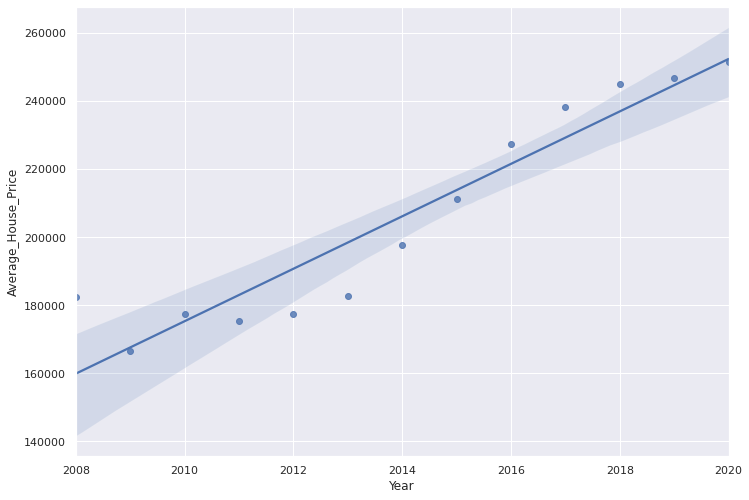

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df_rental['Year'],df_rental['Average_House_Price'],color = 'b')

<AxesSubplot:xlabel='England', ylabel='Average_House_Price'>

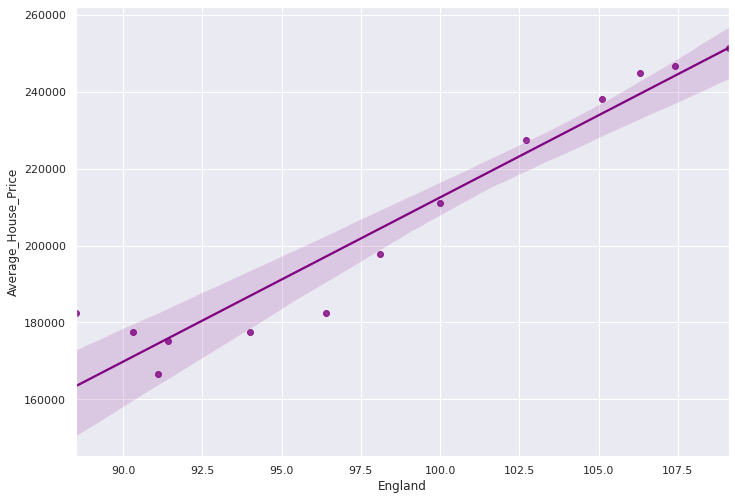

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df_rental['England'],df_rental['Average_House_Price'],color = 'purple')

<AxesSubplot:xlabel='CPIH', ylabel='Average_House_Price'>

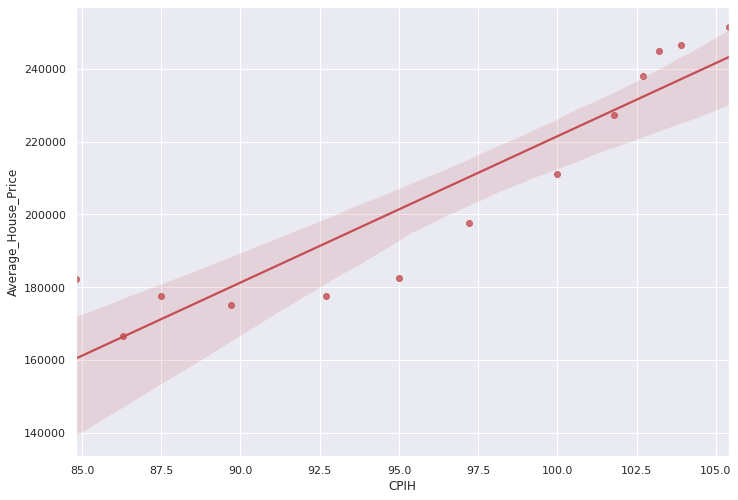

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(df_rental['CPIH'],df_rental['Average_House_Price'],color = 'r')

### The results are showing a very high correlation with the Average Price

### It means all the variables has p_value < 0.05, a satistically significant.

## Algorithm Selection

### There are plenty of Regression algorithms like Decision Tree, Random Forest, Gradient Boosting, XGboost, RBF Neural, LightGBM, and many more. You can choose anyone to train your model. The Decision Tree is efficient for the linear model and has fewer functions due to the development of advanced algorithms like Random Forest and others. Both Decision Tree and Random Forest are based on Tree Structure. But the Random Forest is based on many Decision Trees, an ensemble method.

### I have selected Random Forest due to its versatility. It can be applied to both Regression and Classification Tasks. First, we start with data cross-validation, an efficient way to use data in both training and testing. iI also gives your model the opportunity to train on multiple train-test splits. 

### Cross Validation (rotation estimation or out-of-sample testing)

In [22]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import normalize
kf = KFold(n_splits=4,shuffle=True,random_state=42)
scaler = MinMaxScaler()
X = df[['Year', 'Employment_Rate', 'Unemployment_Rate', 'Inflation_Rate',
       'Population', 'GDP']]
X = np.asarray(X)
X = scaler.fit(X).transform(X)
X = preprocessing.StandardScaler().fit(X).transform(X)
#scaler = MinMaxScaler()
y =  np.asarray(df['Average_House_Price']).reshape(-1, 1)
#y = scaler.fit(y).transform(y)
#y = y.reshape(1,-1)
y = preprocessing.StandardScaler().fit(y).transform(y)
#y = scaler.fit(y).transform(y)
#y = preprocessing.normalize(y)
for train, test in kf.split(X,y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('=====================================')
print("StratifiedKFold done")

Train set: (31, 6) (31, 1)
Test set: (10, 6) (10, 1)
StratifiedKFold done


### Model Designing

In [23]:
# Specify Model
model = RandomForestRegressor(random_state=42,n_estimators=110,max_depth=None,max_leaf_nodes=324,
                                              n_jobs=-1,min_samples_leaf=1) #110,325
# Fit Model

model.fit(X_train, y_train.ravel())

# Make validation predictions

y_pred = model.predict(X_test)

# Model Score

print ("Model Accuracy {:,.5f}".format(model.score(X_test, y_test)))

Model Accuracy 0.98555


## Model Evaluation

### There are different evaluation techniques in Machine Learning Industry for Regression and Classification.

### We measure accuracy as well as error for Classification problems.

### We use error evaluation for Regression Problems. The most common evaluation methods are 'root mean square', 'absolute mean error', and 'root mean squared error'. 

### Minimum error means, more efficient model.

### This model is non overfitting because most of the features are correlated with the target variable, The Average House Price.

### The below evaluation techniques are spot on.

In [27]:
val_mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error: {:,.5f}".format(val_mae))
print ("Mean Squared Error: {:,.5f}".format(mean_squared_error(y_pred,y_test) ))
print ("RMSE {:,.5f}".format( np.sqrt(mean_squared_error(y_pred,y_test))))



Mean Absolute Error: 0.07321
Mean Squared Error: 0.01035
RMSE 0.10175
